# <u>PRACTICAL - 3</u>

## <u>QUESTION</u> - 

### Use the Decision Tree classification algorithm to construct a classifier on two datasets. 
### Evaluate the classifier's performance by dividing the dataset into a training set (75%) and 
### a test set (25%). Compare the performance with that of:
### a. Bagging ensemble consisting of 3,5,7,9 Decision tree classifiers
### b. Adaboost ensemble consisting of 3,5,7,9 Decision tree classifiers

### <u>DATASET 1</u> -> Rice (Cammeo and Osmancik) (https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik)

### <u>DATASET 2</u> -> Dry Bean (https://archive.ics.uci.edu/dataset/602/dry+bean+dataset)

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay)

#### DATASET-1 Rice (Cammeo and Osmancik)

In [2]:
# Import Dataset 1

rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
frames1=[X,y]
df1=pd.concat(frames1,axis=1)
df1.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [3]:
df1.shape

(3810, 8)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [5]:
d = []
u = []
t = []
for col in df1:
    d.append(col)
    u.append(df1[col].nunique())
    t.append(df1[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,Area,int64,2828
1,Perimeter,float64,3738
2,Major_Axis_Length,float64,3808
3,Minor_Axis_Length,float64,3804
4,Eccentricity,float64,3803
5,Convex_Area,int64,2857
6,Extent,float64,3804
7,Class,object,2


In [6]:
df1['Class'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [7]:
# Checking Null Values

df1.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [8]:
# Checking Duplicate Values

df1.duplicated().sum()

0

In [9]:
df1.describe(include='object')

,Class
count,3810
unique,2
top,Osmancik
freq,2180


In [10]:
df1.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [11]:
df1.Class.value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

In [12]:
# Detecting Outliers

def boxplots(df1):
    cols = df1.columns[::]
    n = 2
    m = 4
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(20,15))
    for idx, col in enumerate(cols):
        i = idx // m
        j = idx % m
        if df1[col].dtype == 'object':
            sns.countplot(data=df1, x=col, ax=axes[i][j])
        else:
            sns.boxplot(data=df1, x=col, ax=axes[i][j])
    plt.tight_layout()
    plt.show()

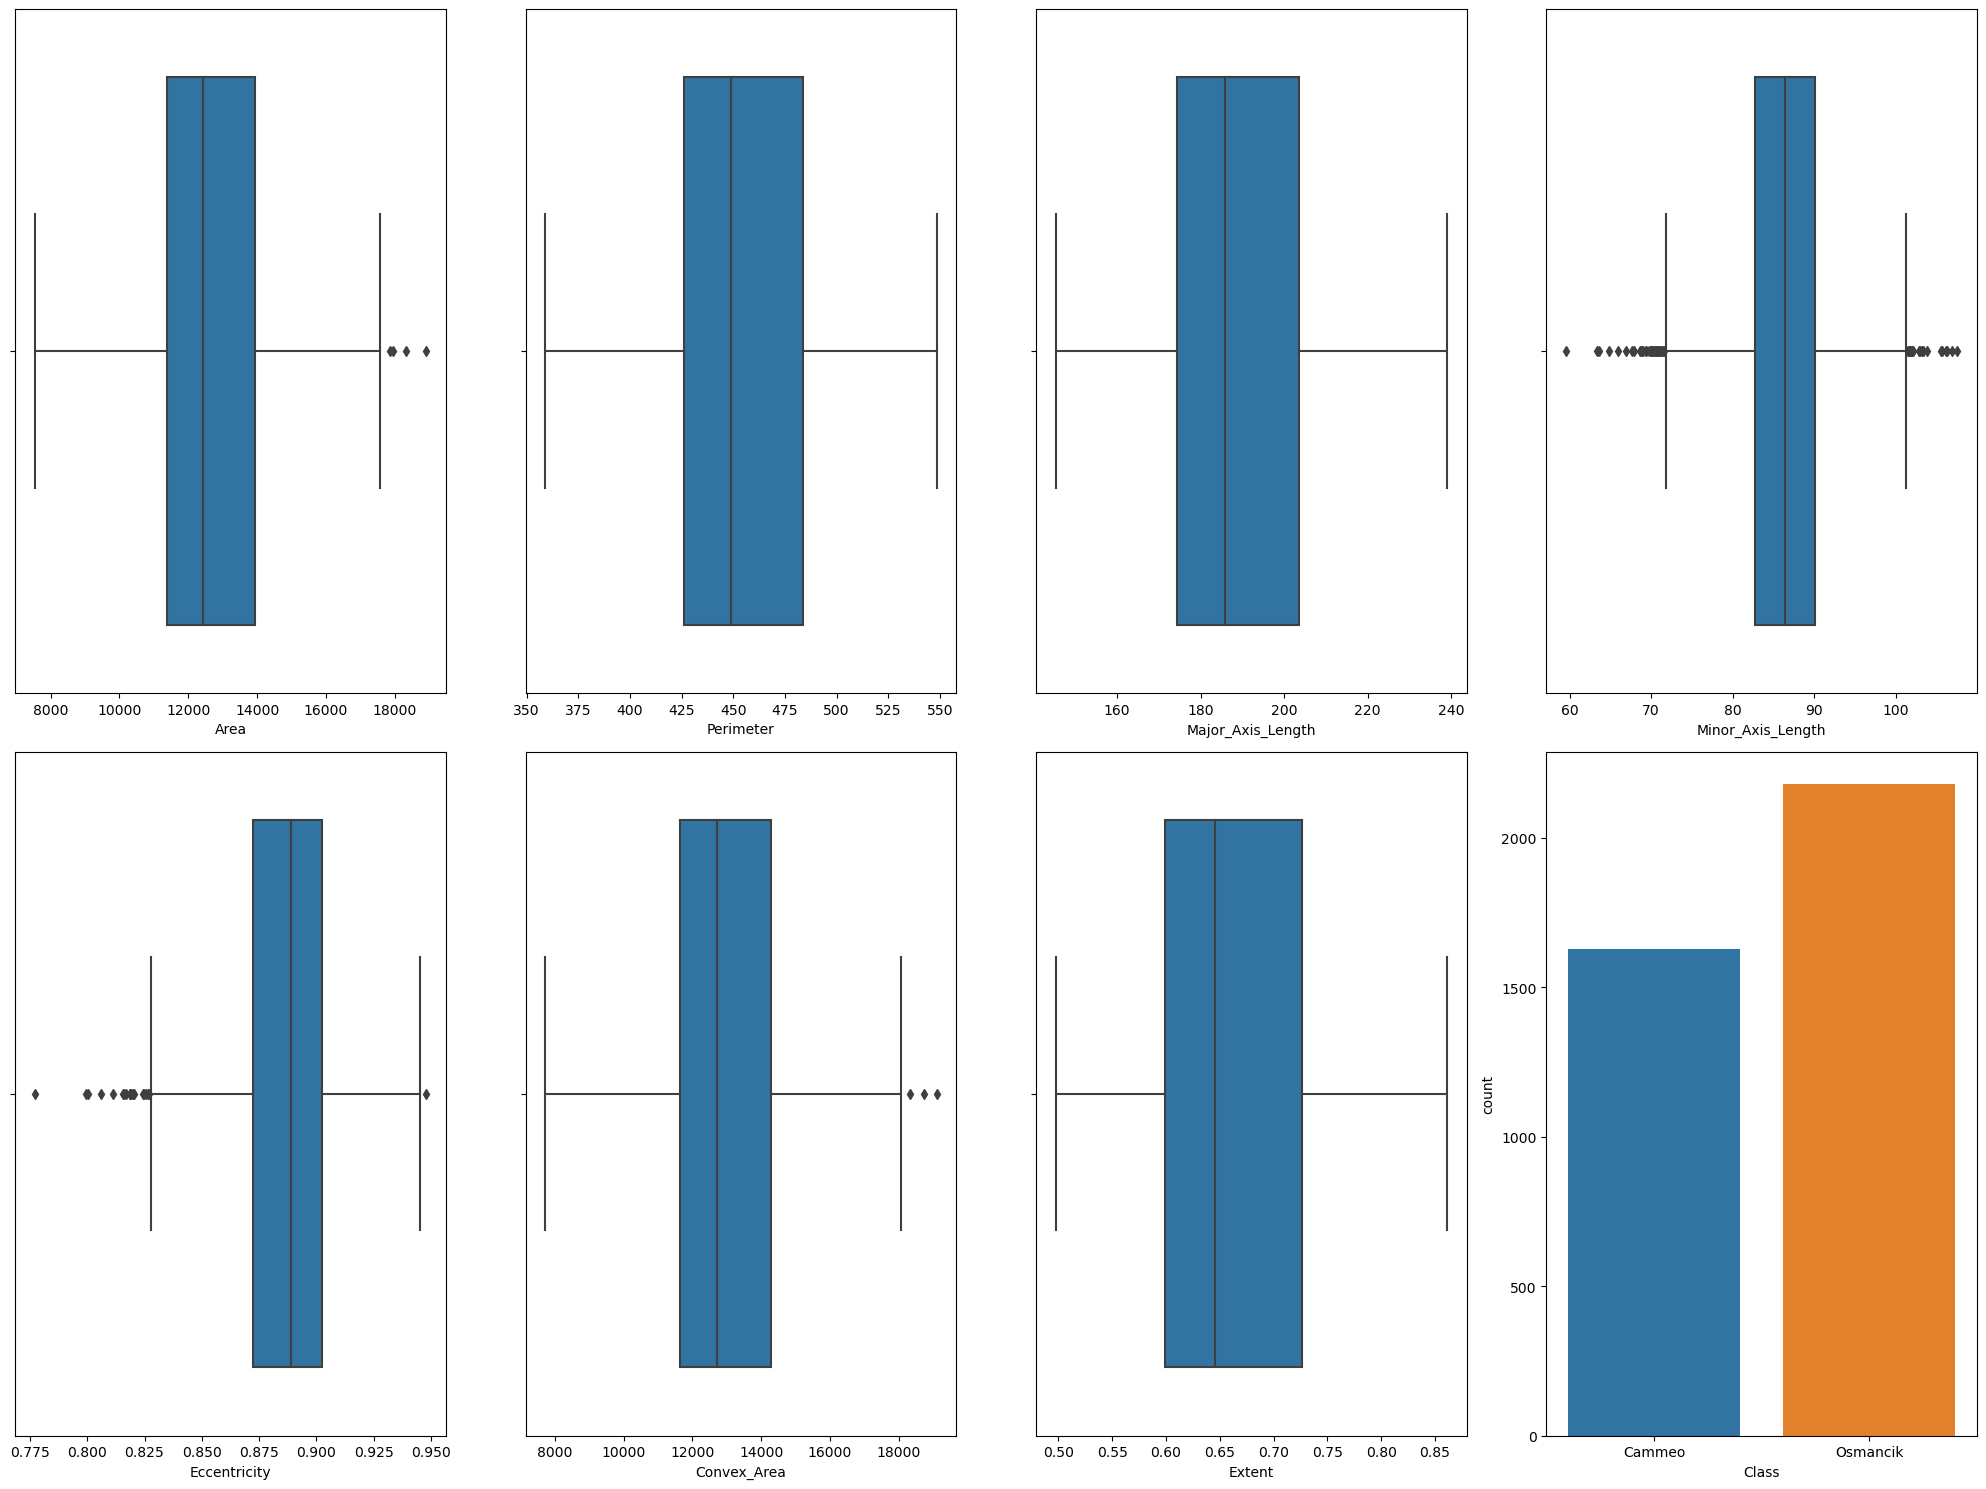

In [13]:
boxplots(df1)

In [14]:
# Fixing Outliers 

def outliers_removal(df1, col):
    if df1[col].dtype != 'object':
        perc = np.percentile(df1[col], [0, 25, 50, 75, 100])
        iqr = perc[3] - perc[1]
        _min = perc[1] - 1.5*iqr
        _max = perc[3] + 1.5*iqr
        df1.loc[df1[col] > _max, col] = _max
        df1.loc[df1[col] < _min, col] = _min
    return df1
for col in df1.columns[::]:
    df1 = outliers_removal(df1, col)

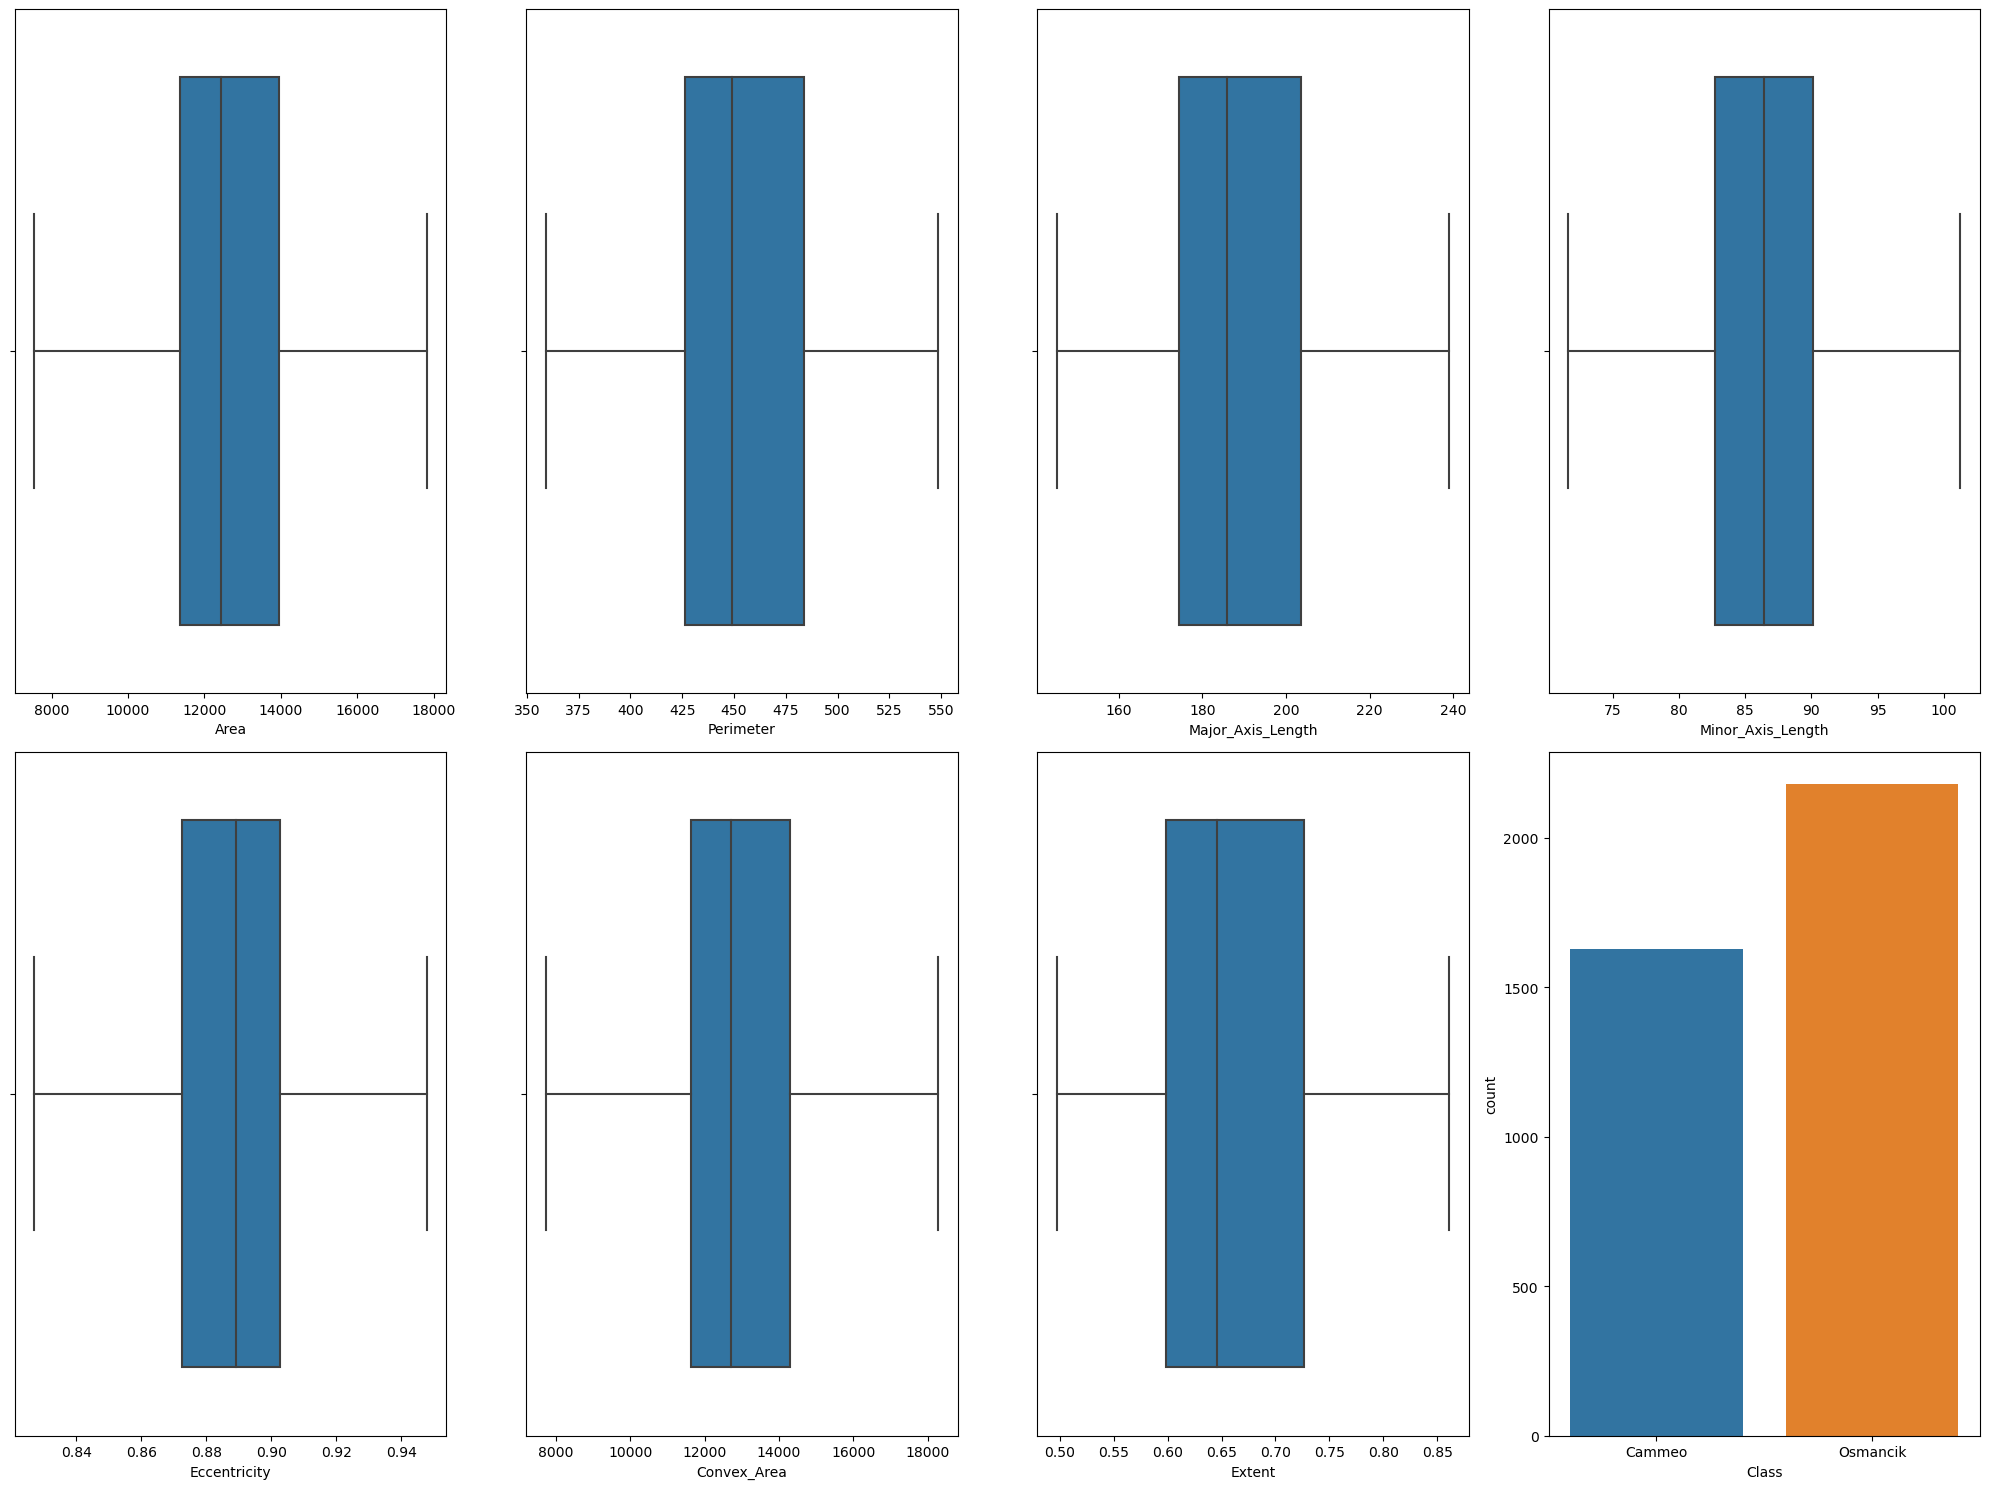

In [15]:
boxplots(df1)

In [16]:
df1.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo


In [17]:
df1['Class'].value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

#### DECISION TREE CLASSIFICATION

In [18]:
X=df1.drop('Class',axis=1)
y=df1['Class']

In [19]:
# Split the dataset into training and testing sets using the train_test_split function

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, stratify=y, random_state=15)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(3810, 7) (2857, 7) (953, 7)


In [21]:
y_train.value_counts()

Osmancik    1635
Cammeo      1222
Name: Class, dtype: int64

In [22]:
cols=X_train.columns

# Initialize a StandardScaler instance for feature scaling

scaler = StandardScaler()

# Fit the scaler on the training data and apply it to transform the training features

X_train = scaler.fit_transform(X_train)

# Apply the already-fitted scaler to transform the test features

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [23]:
X_train.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,2.313263,1.693628,1.440571,2.451679,-0.161090,2.274018,-0.674951
1,1.455083,1.492192,1.162843,1.352166,0.308636,1.552619,-1.122373
2,0.096492,0.000240,-0.168237,0.580867,-0.523664,0.102983,-0.984858
3,-0.932389,-0.822810,-0.449403,-1.431767,0.710293,-0.963729,-1.206368
4,-0.030948,-0.123867,-0.536488,0.793653,-1.180062,0.007823,-0.431996


In [24]:
# Initialize a DecisionTreeClassifier with the 'gini' criterion and a fixed random state for reproducibility

clf = DecisionTreeClassifier(criterion='gini', random_state=0)

# Fit the decision tree model on the training data (X_train, y_train)

clf = clf.fit(X_train,y_train)

# Predict the target values (y_pred) for the test data (X_test) using the trained model

y_pred = clf.predict(X_test)
df_1=pd.DataFrame({'Actual Class':y_test,'Predicted Class':y_pred})
df_1

,Actual Class,Predicted Class
3566,Osmancik,Osmancik
571,Cammeo,Cammeo
560,Cammeo,Cammeo
764,Cammeo,Cammeo
1513,Cammeo,Osmancik
...,...,...
2819,Osmancik,Osmancik
966,Cammeo,Cammeo
1253,Cammeo,Cammeo
3328,Osmancik,Osmancik


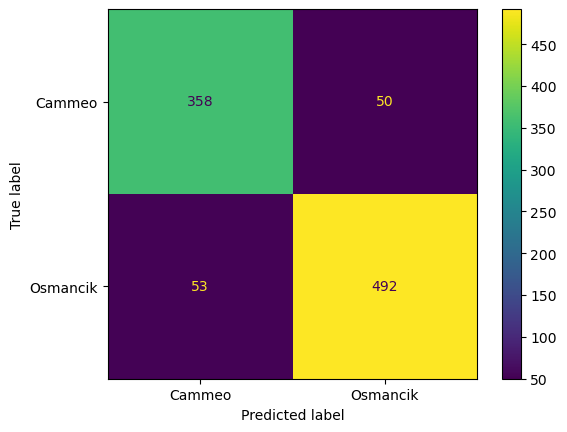

In [25]:
# Confusion Matrix

labels=df1['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Cammeo       0.87      0.88      0.87       408
    Osmancik       0.91      0.90      0.91       545

    accuracy                           0.89       953
   macro avg       0.89      0.89      0.89       953
weighted avg       0.89      0.89      0.89       953



In [27]:
acc1=accuracy_score(y_test, y_pred)*100
print('Accuracy using Decision Tree Classification :',acc1)

Accuracy using Decision Tree Classification : 89.19202518363065


In [28]:
p1=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('Precision using Decision Tree Classification :',p1)

Precision using Decision Tree Classification : 90.7749077490775


#### BAGGING ENSEMBLE

In [29]:
# 3 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=3, max_samples=0.7, \
                            oob_score=True, random_state=0)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8256912845642282

In [30]:
y_pred=bag_model.predict(X_test)
df_11=pd.DataFrame({'Actual Class':y_test,'Predicted Class':y_pred})
df_11

,Actual Class,Predicted Class
3566,Osmancik,Osmancik
571,Cammeo,Cammeo
560,Cammeo,Cammeo
764,Cammeo,Cammeo
1513,Cammeo,Osmancik
...,...,...
2819,Osmancik,Osmancik
966,Cammeo,Cammeo
1253,Cammeo,Cammeo
3328,Osmancik,Osmancik


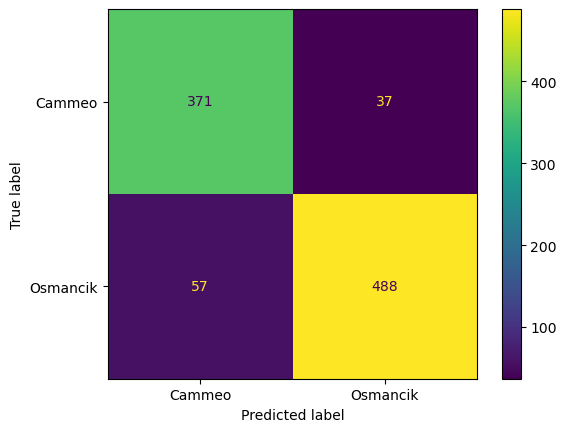

In [31]:
labels=df1['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Cammeo       0.87      0.91      0.89       408
    Osmancik       0.93      0.90      0.91       545

    accuracy                           0.90       953
   macro avg       0.90      0.90      0.90       953
weighted avg       0.90      0.90      0.90       953



In [33]:
acc2=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 3 Classifiers: ',acc2)

Bagging Ensemble Accuracy Score with 3 Classifiers:  90.1364113326338


In [34]:
p2=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('Bagging Ensemble Precision Score with 3 Classifiers: ',p2)

Bagging Ensemble Precision Score with 3 Classifiers:  92.95238095238095


In [35]:
# 5 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5, max_samples=0.7, \
                            oob_score=True, random_state=0)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8732936646832342

In [36]:
y_pred=bag_model.predict(X_test)
acc3=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 5 Classifiers: ',acc3)

Bagging Ensemble Accuracy Score with 5 Classifiers:  91.2906610703043


In [37]:
p3=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('Bagging Ensemble Precision Score with 5 Classifiers: ',p3)

Bagging Ensemble Precision Score with 5 Classifiers:  93.75


In [38]:
# 7 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=7, max_samples=0.7, \
                            oob_score=True, random_state=0)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8946447322366118

In [39]:
y_pred=bag_model.predict(X_test)
acc4=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 7 Classifiers: ',acc4)

Bagging Ensemble Accuracy Score with 7 Classifiers:  92.33997901364114


In [40]:
p4=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('Bagging Ensemble Precision Score with 7 Classifiers: ',p4)

Bagging Ensemble Precision Score with 7 Classifiers:  94.52830188679245


In [41]:
# 9 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=9, max_samples=0.7, \
                            oob_score=True, random_state=0)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.9068953447672383

In [42]:
y_pred=bag_model.predict(X_test)
acc5=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 9 Classifiers: ',acc5)

Bagging Ensemble Accuracy Score with 9 Classifiers:  92.13011542497377


In [43]:
p5=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('Bagging Ensemble Precision Score with 9 Classifiers: ',p5)

Bagging Ensemble Precision Score with 9 Classifiers:  94.17293233082707


#### ADABOOST ENSEMBLE

In [44]:
# 3 classifiers

ada_model=AdaBoostClassifier(n_estimators=3, learning_rate=0.5, random_state=0)

In [45]:
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
df_111=pd.DataFrame({'Actual Class':y_test,'Predicted Class':y_pred})
df_111

,Actual Class,Predicted Class
3566,Osmancik,Osmancik
571,Cammeo,Cammeo
560,Cammeo,Cammeo
764,Cammeo,Cammeo
1513,Cammeo,Osmancik
...,...,...
2819,Osmancik,Osmancik
966,Cammeo,Cammeo
1253,Cammeo,Cammeo
3328,Osmancik,Osmancik


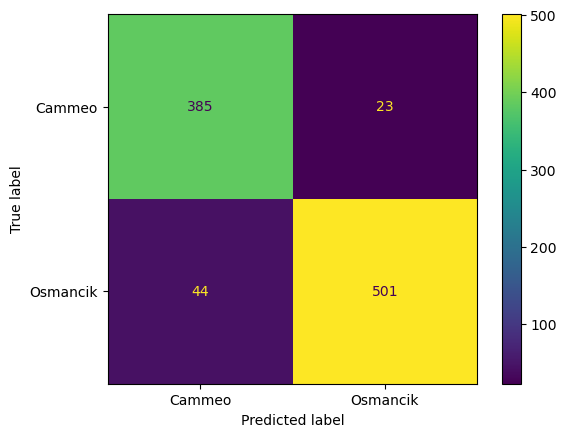

In [46]:
labels=df1['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Cammeo       0.90      0.94      0.92       408
    Osmancik       0.96      0.92      0.94       545

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953



In [48]:
acc6=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 3 Classifiers: ',acc6)

AdaBoost Ensemble Accuracy Score with 3 Classifiers:  92.96956977964324


In [49]:
p6=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('AdaBoost Ensemble Precision Score with 3 Classifiers: ',p6)

AdaBoost Ensemble Precision Score with 3 Classifiers:  95.61068702290076


In [50]:
# 5 classifiers

ada_model=AdaBoostClassifier(n_estimators=5, learning_rate=0.5, random_state=0)
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
acc7=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 5 Classifiers: ',acc7)
p7=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('AdaBoost Ensemble Precision Score with 5 Classifiers: ',p7)

AdaBoost Ensemble Accuracy Score with 5 Classifiers:  92.96956977964324
AdaBoost Ensemble Precision Score with 5 Classifiers:  95.61068702290076


In [51]:
# 7 classifiers

ada_model=AdaBoostClassifier(n_estimators=7, learning_rate=0.5, random_state=0)
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
acc8=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 7 Classifiers: ',acc8)
p8=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('AdaBoost Ensemble Precision Score with 7 Classifiers: ',p8)

AdaBoost Ensemble Accuracy Score with 7 Classifiers:  92.96956977964324
AdaBoost Ensemble Precision Score with 7 Classifiers:  95.61068702290076


In [52]:
# 9 classifiers

ada_model=AdaBoostClassifier(n_estimators=9, learning_rate=0.5, random_state=0)
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
acc9=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 9 Classifiers: ',acc9)
p9=precision_score(y_test, y_pred, pos_label='Osmancik')*100
print('AdaBoost Ensemble Precision Score with 9 Classifiers: ',p9)

AdaBoost Ensemble Accuracy Score with 9 Classifiers:  92.96956977964324
AdaBoost Ensemble Precision Score with 9 Classifiers:  95.61068702290076


#### ACCURACY AND PRECISION SCORES PLOTTING

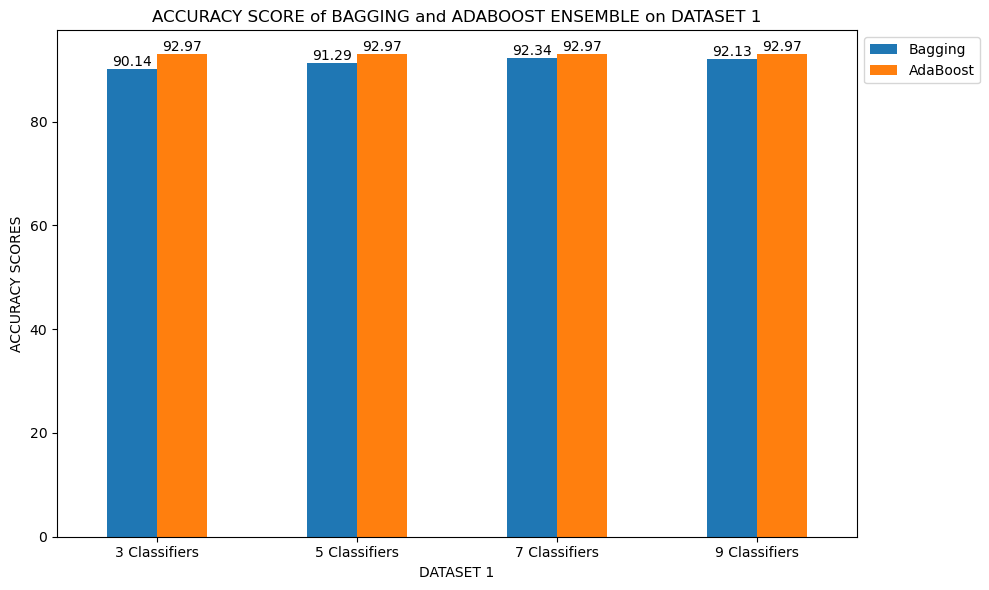

In [53]:
data1={'Bagging': [acc2, acc3, acc4, acc5],
         'AdaBoost': [acc6, acc7, acc8, acc9]}
_df1=pd.DataFrame(data1, columns=['Bagging', 'AdaBoost'],
                   index=['3 Classifiers', '5 Classifiers', '7 Classifiers', '9 Classifiers'])
fig, ax = plt.subplots(figsize=(10, 6))
_df1.plot.bar(ax=ax, rot=0)
def addlabels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.01), 
                    ha='center', va='bottom')
addlabels(ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("ACCURACY SCORE of BAGGING and ADABOOST ENSEMBLE on DATASET 1")
plt.xlabel("DATASET 1")
plt.ylabel("ACCURACY SCORES")
plt.tight_layout() 
plt.show()

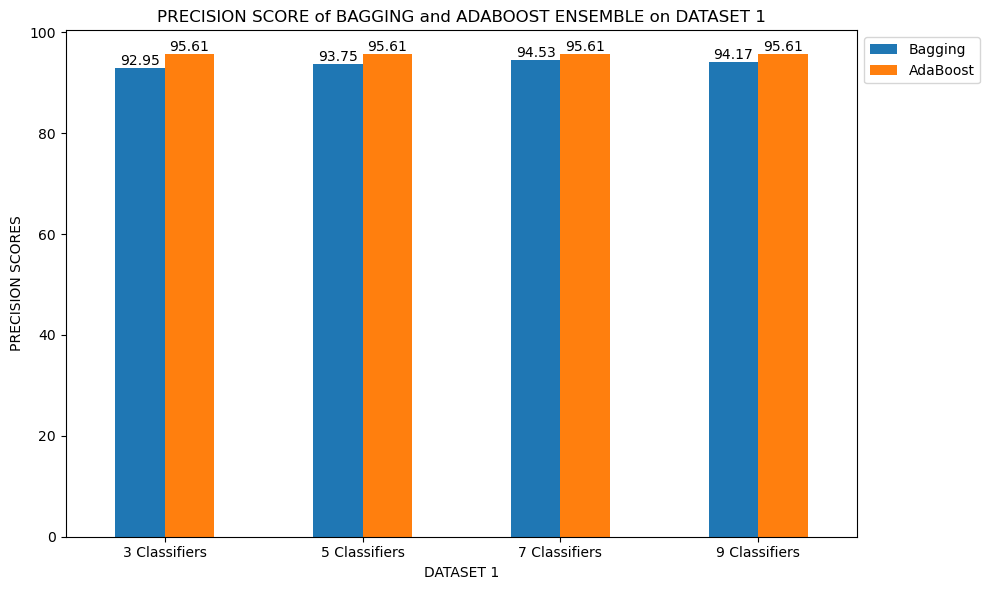

In [54]:
data2={'Bagging': [p2, p3, p4, p5],
         'AdaBoost': [p6, p7, p8, p9]}
_df2=pd.DataFrame(data2, columns=['Bagging', 'AdaBoost'],
                   index=['3 Classifiers', '5 Classifiers', '7 Classifiers', '9 Classifiers'])
fig, ax = plt.subplots(figsize=(10, 6))
_df2.plot.bar(ax=ax, rot=0)
def addlabels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.01), 
                    ha='center', va='bottom')
addlabels(ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("PRECISION SCORE of BAGGING and ADABOOST ENSEMBLE on DATASET 1")
plt.xlabel("DATASET 1")
plt.ylabel("PRECISION SCORES")
plt.tight_layout() 
plt.show()

*****

#### DATASET-2 Dry Bean

In [55]:
dry_bean = fetch_ucirepo(id=602)  
X_= dry_bean.data.features 
y_= dry_bean.data.targets 
frames2=[X_,y_]
df2=pd.concat(frames2,axis=1)
df2.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [56]:
df2.shape

(13611, 17)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [58]:
d = []
u = []
t = []
for col in df2:
    d.append(col)
    u.append(df2[col].nunique())
    t.append(df2[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,Area,int64,12011
1,Perimeter,float64,13351
2,MajorAxisLength,float64,13543
3,MinorAxisLength,float64,13543
4,AspectRatio,float64,13543
5,Eccentricity,float64,13543
6,ConvexArea,int64,12066
7,EquivDiameter,float64,12011
8,Extent,float64,13535
9,Solidity,float64,13522


In [59]:
df2['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [60]:
df2.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [61]:
df2.duplicated().sum()

68

In [62]:
# Dropping Duplicate Values

df2.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13543 entries, 0 to 13542
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRatio      13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  Roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [64]:
df2.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [65]:
df2.describe(include='object')

,Class
count,13543
unique,7
top,DERMASON
freq,3546


In [66]:
df2.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [67]:
df2['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [68]:
# Detecting Outliers 

def boxplots(df2):
    cols = df2.columns[::]
    n = 5
    m = 4
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(20,15))
    for idx, col in enumerate(cols):
        i = idx // m
        j = idx % m
        if df2[col].dtype == 'object':
            sns.countplot(data=df2, x=col, ax=axes[i][j])
        else:
            sns.boxplot(data=df2, x=col, ax=axes[i][j])
    plt.tight_layout()
    plt.show()

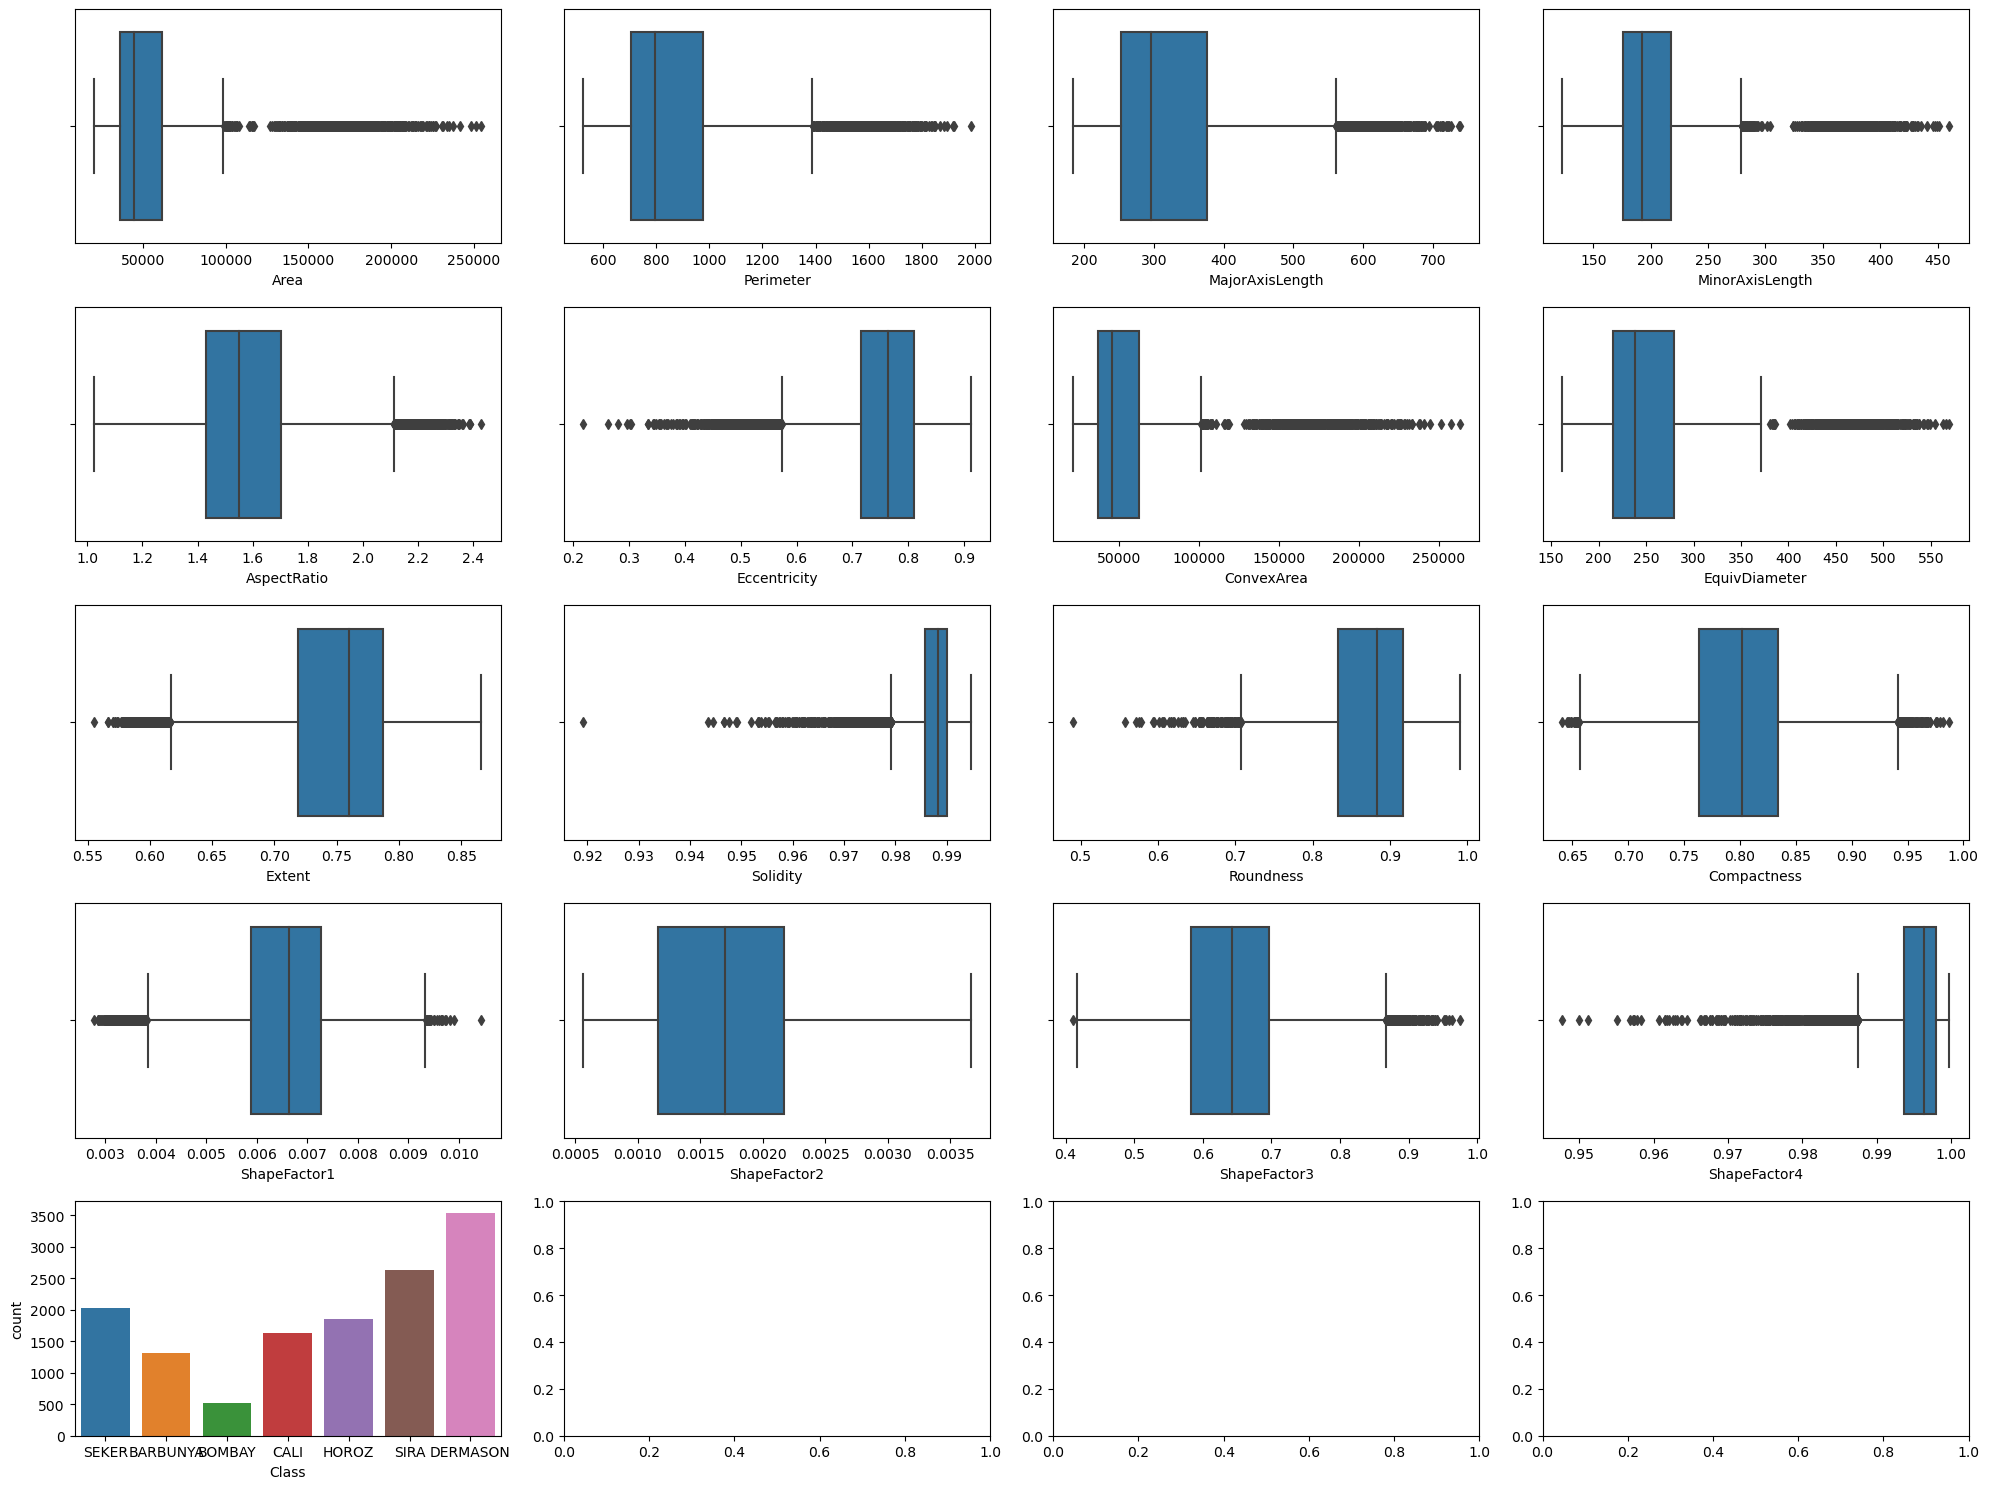

In [69]:
boxplots(df2)

In [70]:
# Fixing Outliers

def outliers_removal(df2, col):
    if df2[col].dtype != 'object':
        perc = np.percentile(df2[col], [0, 25, 50, 75, 100])
        iqr = perc[3] - perc[1]
        _min = perc[1] - 1.5*iqr
        _max = perc[3] + 1.5*iqr
        df2.loc[df2[col] > _max, col] = _max
        df2.loc[df2[col] < _min, col] = _min
    return df2
for col in df2.columns[::]:
    df2 = outliers_removal(df2, col)

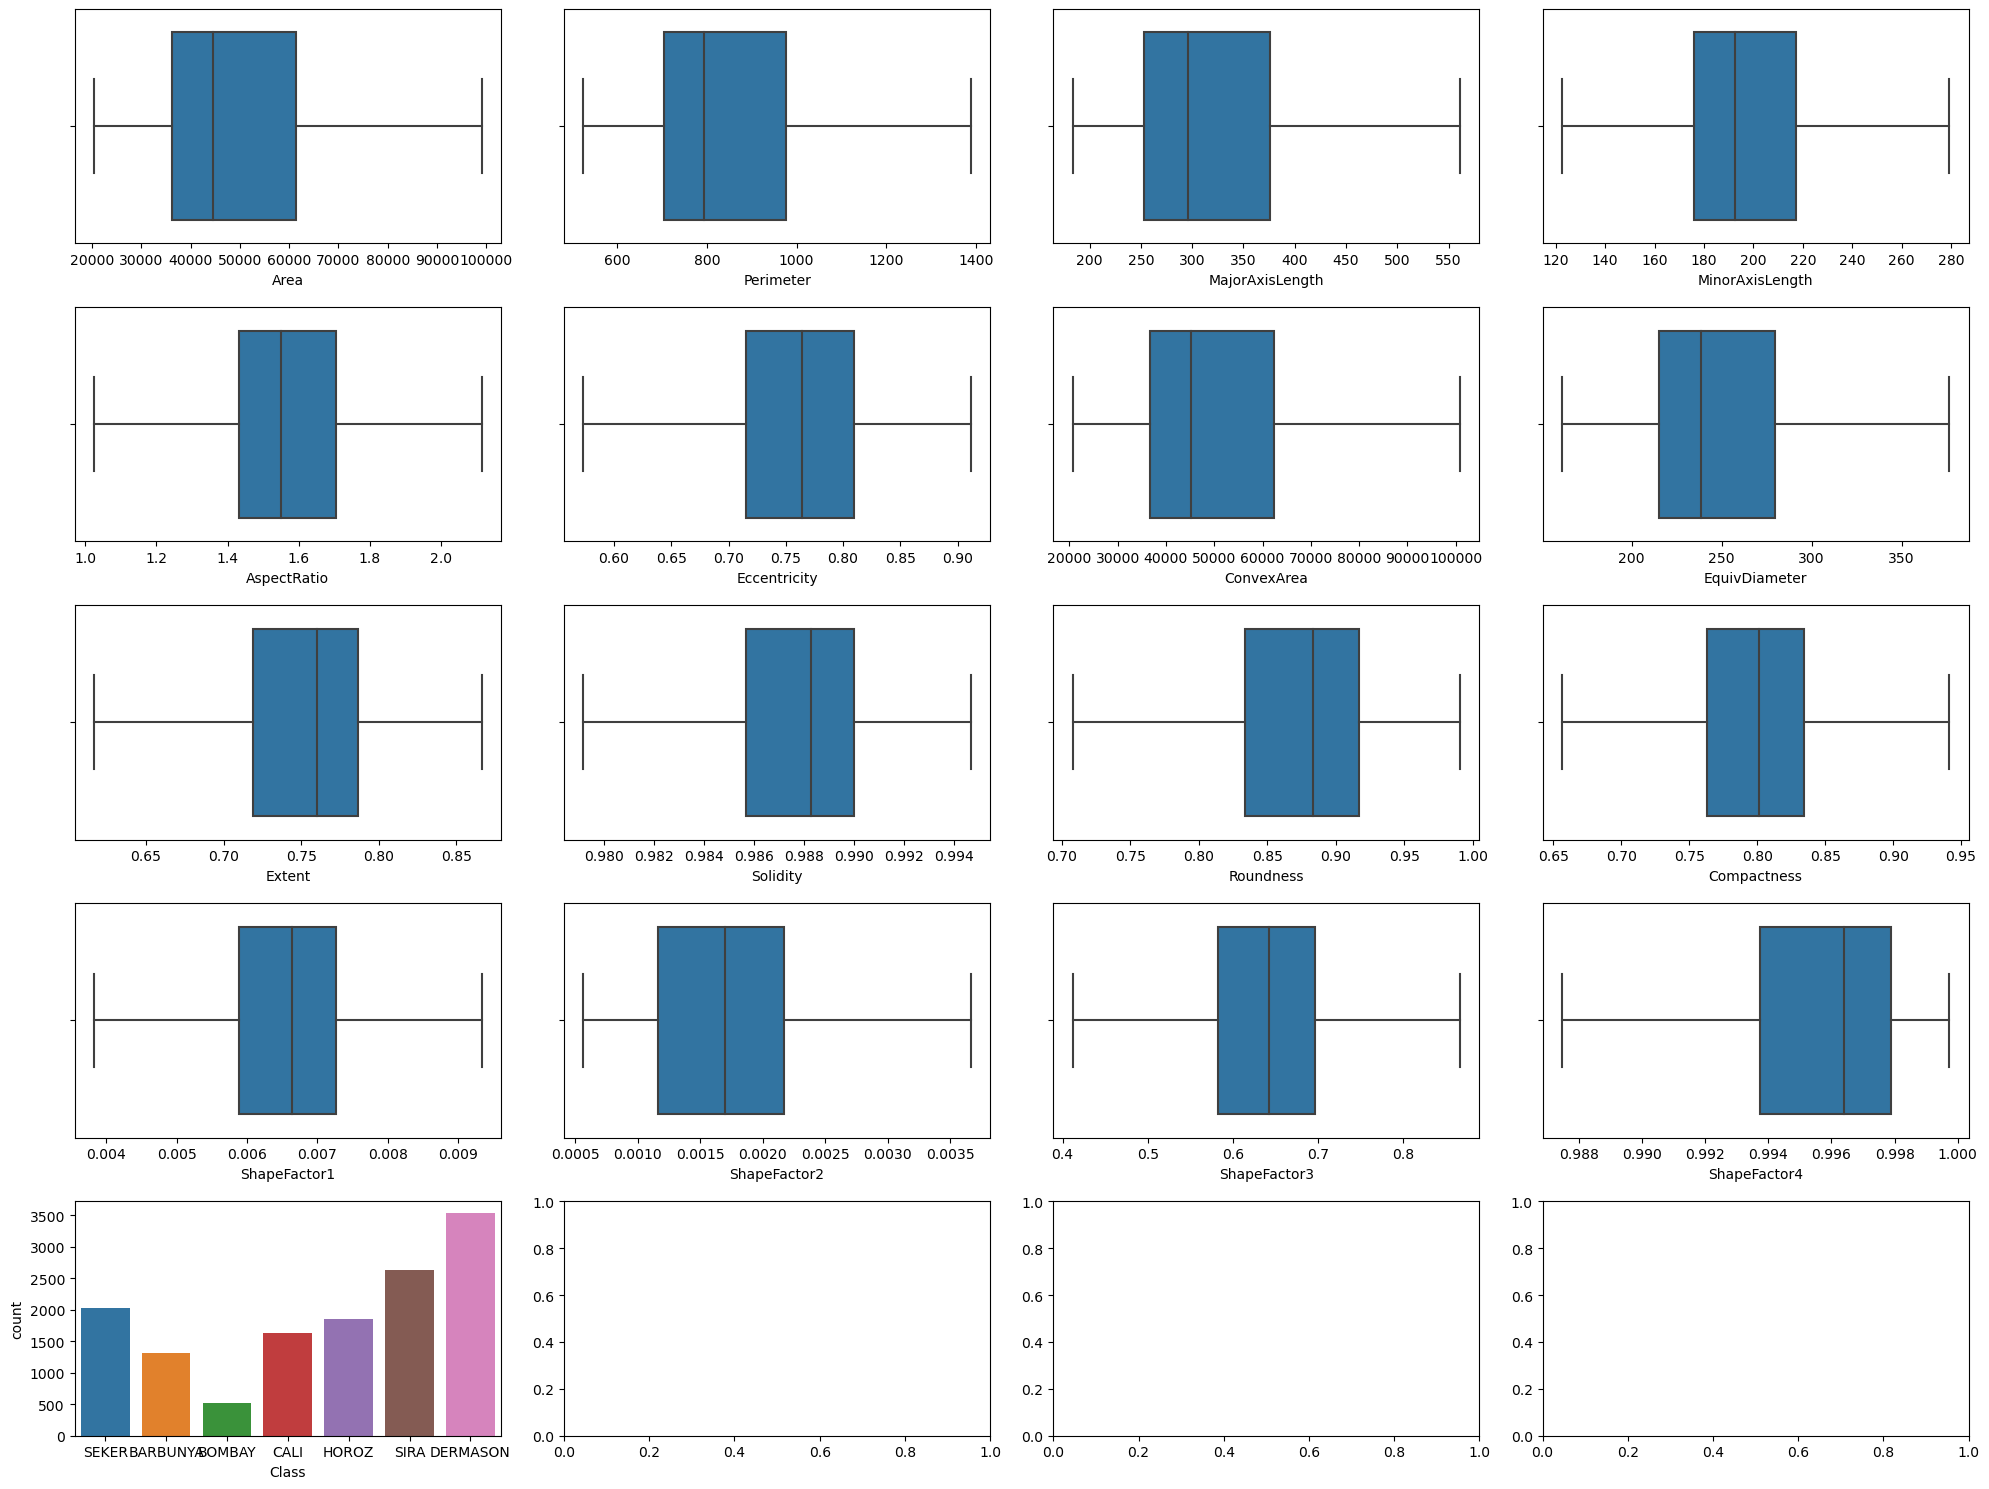

In [71]:
boxplots(df2)

In [72]:
df2.shape

(13543, 17)

#### DECISION TREE CLASSIFICATION

In [73]:
X_=df2.drop('Class',axis=1)
y_=df2['Class']

In [74]:
X_.reset_index(inplace=True, drop=True)

In [75]:
X_.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395.0,610.291,208.178117,173.888747,1.197191,0.573352,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734.0,638.018,200.524796,182.734419,1.097356,0.573352,29172.0,191.272751,0.783968,0.984986,0.887034,0.941333,0.006979,0.003564,0.867076,0.998430
2,29380.0,624.110,212.826130,175.931143,1.209713,0.573352,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008.0,645.884,210.557999,182.516516,1.153638,0.573352,30724.0,195.467062,0.782681,0.979168,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140.0,620.134,201.847882,190.279279,1.060798,0.573352,30417.0,195.896503,0.773098,0.990893,0.984877,0.941333,0.006697,0.003665,0.867076,0.999166


In [76]:
y_.reset_index(inplace=True, drop=True)

In [77]:
y_.head()

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X_, y_, test_size = 0.25, random_state=25)

In [79]:
print(X_.shape, X_train.shape, X_test.shape)

(13543, 16) (10157, 16) (3386, 16)


In [80]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
12076,33165.0,671.026,251.430217,168.315167,1.493806,0.742874,33461.0,205.492067,0.809060,0.991154,0.925574,0.817293,0.007581,0.002087,0.667967,0.997814
631,37152.0,694.797,246.690685,192.216585,1.283400,0.626800,37406.0,217.493438,0.776848,0.993210,0.967111,0.881644,0.006640,0.002475,0.777297,0.997582
2217,59151.0,931.540,305.938941,247.631523,1.235460,0.587237,60079.0,274.432856,0.797699,0.984554,0.856582,0.897018,0.005172,0.002066,0.804642,0.994103
6455,54046.0,951.099,364.519035,193.599822,1.882848,0.847303,55750.0,262.323282,0.756354,0.979168,0.750796,0.719642,0.006745,0.001116,0.517885,0.987463
4756,75706.0,1054.586,408.598294,237.619030,1.719552,0.813513,76512.0,310.470406,0.807401,0.989466,0.855414,0.759843,0.005397,0.001110,0.577361,0.992802


In [81]:
y_train.value_counts()

DERMASON    2686
SIRA        1974
SEKER       1492
HOROZ       1426
CALI        1193
BARBUNYA     986
BOMBAY       400
Name: Class, dtype: int64

In [82]:
cols=X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [83]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.898043,-0.927757,-0.829706,-0.917479,-0.356833,-0.132110,-0.900891,-0.921951,1.218824,1.039860,0.889228,0.280611,0.916238,0.618895,0.247949,0.747194
1,-0.686934,-0.802515,-0.888504,-0.192524,-1.236863,-1.530752,-0.696248,-0.669795,0.548846,1.617942,1.603858,1.332196,0.054979,1.271616,1.367121,0.676872
2,0.477897,0.444813,-0.153480,1.488268,-1.437370,-2.007457,0.479892,0.526536,0.982526,-0.816123,-0.297767,1.583427,-1.288281,0.583769,1.647047,-0.380760
3,0.207591,0.547864,0.573255,-0.150569,1.270343,1.126199,0.255329,0.272107,0.122572,-2.330692,-2.117794,-1.315118,0.150671,-1.013397,-1.288399,-2.399579
4,1.354473,1.093106,1.120095,1.184579,0.587354,0.719050,1.332338,1.283707,1.184322,0.565144,-0.317869,-0.658193,-1.082379,-1.023575,-0.679562,-0.776369


In [84]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_2=pd.DataFrame({'Actual Class':y_test,'Predicted Class':y_pred})
df_2

,Actual Class,Predicted Class
3985,CALI,BARBUNYA
6280,HOROZ,HOROZ
5316,CALI,BARBUNYA
1138,SEKER,SEKER
4015,CALI,CALI
...,...,...
4982,CALI,CALI
10204,DERMASON,DERMASON
3196,BARBUNYA,BARBUNYA
8182,SIRA,SIRA


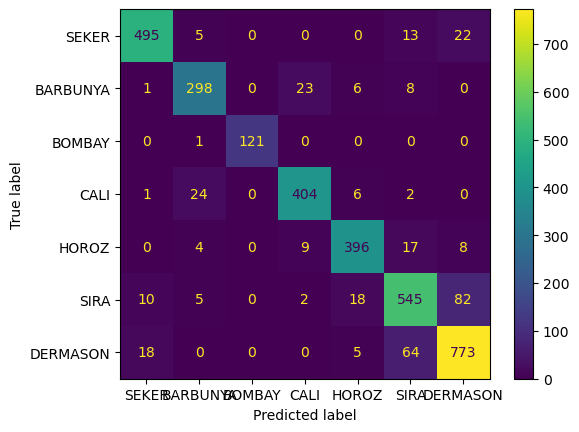

In [85]:
labels=df2['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.89      0.89       336
      BOMBAY       1.00      0.99      1.00       122
        CALI       0.92      0.92      0.92       437
    DERMASON       0.87      0.90      0.89       860
       HOROZ       0.92      0.91      0.92       434
       SEKER       0.94      0.93      0.93       535
        SIRA       0.84      0.82      0.83       662

    accuracy                           0.90      3386
   macro avg       0.91      0.91      0.91      3386
weighted avg       0.90      0.90      0.90      3386



In [87]:
acc11=accuracy_score(y_test, y_pred)*100
print('Accuracy using Decision Tree Classification: ',acc11)
p11=precision_score(y_test, y_pred, average='macro')*100
print('Precision using Decision Tree Classification: ',p11)

Accuracy using Decision Tree Classification:  89.54518606024808
Precision using Decision Tree Classification:  91.16425524499333


#### BAGGING ENSEMBLE

In [88]:
# 3 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=3, max_samples=0.7, \
                            oob_score=True, random_state=100)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7875356896721473

In [89]:
y_pred=bag_model.predict(X_test)
df_22=pd.DataFrame({'Actual Class':y_test,'Predicted Class':y_pred})
df_22

,Actual Class,Predicted Class
3985,CALI,CALI
6280,HOROZ,HOROZ
5316,CALI,BARBUNYA
1138,SEKER,SEKER
4015,CALI,CALI
...,...,...
4982,CALI,CALI
10204,DERMASON,DERMASON
3196,BARBUNYA,BARBUNYA
8182,SIRA,SIRA


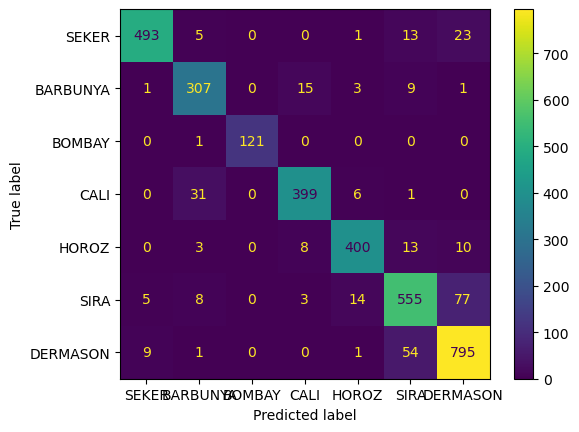

In [90]:
labels=df2['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.86      0.91      0.89       336
      BOMBAY       1.00      0.99      1.00       122
        CALI       0.94      0.91      0.93       437
    DERMASON       0.88      0.92      0.90       860
       HOROZ       0.94      0.92      0.93       434
       SEKER       0.97      0.92      0.95       535
        SIRA       0.86      0.84      0.85       662

    accuracy                           0.91      3386
   macro avg       0.92      0.92      0.92      3386
weighted avg       0.91      0.91      0.91      3386



In [92]:
acc22=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 3 Classifiers: ',acc22)
p22=precision_score(y_test, y_pred, average='macro')*100
print('Bagging Ensemble Precision Score with 3 Classifiers: ',p22)

Bagging Ensemble Accuracy Score with 3 Classifiers:  90.66745422327229
Bagging Ensemble Precision Score with 3 Classifiers:  92.15400787849083


In [93]:
# 5 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5, max_samples=0.7, \
                            oob_score=True, random_state=100)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8685635522299892

In [94]:
y_pred=bag_model.predict(X_test)
acc33=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 5 Classifiers: ',acc33)
p33=precision_score(y_test, y_pred, average='macro')*100
print('Bagging Ensemble Precision Score with 5 Classifiers: ',p33)

Bagging Ensemble Accuracy Score with 5 Classifiers:  91.34672179562907
Bagging Ensemble Precision Score with 5 Classifiers:  92.81485320449676


In [95]:
# 7 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=7, max_samples=0.7, \
                            oob_score=True, random_state=100)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8971152899478192

In [96]:
y_pred=bag_model.predict(X_test)
acc44=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 7 Classifiers: ',acc44)
p44=precision_score(y_test, y_pred, average='macro')*100
print('Bagging Ensemble Precision Score with 7 Classifiers: ',p44)

Bagging Ensemble Accuracy Score with 7 Classifiers:  91.37625516834022
Bagging Ensemble Precision Score with 7 Classifiers:  92.90163698267031


In [97]:
# 9 classifiers

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=9, max_samples=0.7, \
                            oob_score=True, random_state=100)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.9083390764989663

In [98]:
y_pred=bag_model.predict(X_test)
acc55=accuracy_score(y_test, y_pred)*100
print('Bagging Ensemble Accuracy Score with 9 Classifiers: ',acc55)
p55=precision_score(y_test, y_pred, average='macro')*100
print('Bagging Ensemble Precision Score with 9 Classifiers: ',p55)

Bagging Ensemble Accuracy Score with 9 Classifiers:  92.23272297696397
Bagging Ensemble Precision Score with 9 Classifiers:  93.5779875689393


#### ADABOOST ENSEMBLE

In [99]:
# 3 classifiers

ada_model=AdaBoostClassifier(n_estimators=3, learning_rate=0.5, random_state=100)

In [100]:
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
df_222=pd.DataFrame({'Actual Class':y_test,'Predicted Class':y_pred})
df_222

,Actual Class,Predicted Class
3985,CALI,SIRA
6280,HOROZ,HOROZ
5316,CALI,SIRA
1138,SEKER,DERMASON
4015,CALI,SIRA
...,...,...
4982,CALI,SIRA
10204,DERMASON,DERMASON
3196,BARBUNYA,SIRA
8182,SIRA,SIRA


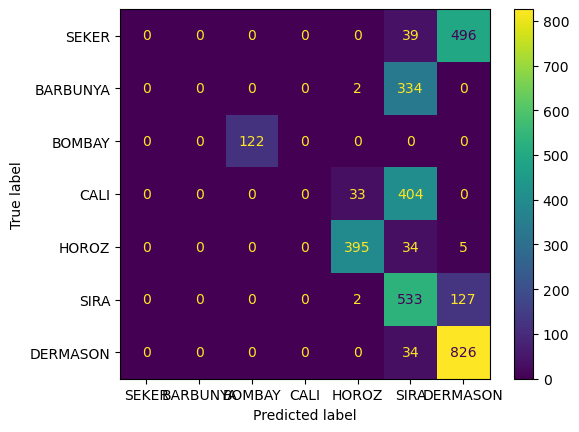

In [101]:
labels=df2['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       336
      BOMBAY       1.00      1.00      1.00       122
        CALI       0.00      0.00      0.00       437
    DERMASON       0.57      0.96      0.71       860
       HOROZ       0.91      0.91      0.91       434
       SEKER       0.00      0.00      0.00       535
        SIRA       0.39      0.81      0.52       662

    accuracy                           0.55      3386
   macro avg       0.41      0.53      0.45      3386
weighted avg       0.37      0.55      0.44      3386



In [103]:
acc66=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 3 Classifiers: ',acc66)
p66=precision_score(y_test, y_pred, average='macro')*100
print('AdaBoost Ensemble Precision Score with 3 Classifiers: ',p66)

AdaBoost Ensemble Accuracy Score with 3 Classifiers:  55.40460720614294
AdaBoost Ensemble Precision Score with 3 Classifiers:  40.98903339563457


In [104]:
# 5 classifiers

ada_model=AdaBoostClassifier(n_estimators=5, learning_rate=0.5, random_state=100)
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
acc77=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 5 Classifiers: ',acc77)
p77=precision_score(y_test, y_pred, average='macro')*100
print('AdaBoost Ensemble Precision Score with 5 Classifiers: ',p77)

AdaBoost Ensemble Accuracy Score with 5 Classifiers:  63.792085056113415
AdaBoost Ensemble Precision Score with 5 Classifiers:  39.71771178179341


In [105]:
# 7 classifiers

ada_model=AdaBoostClassifier(n_estimators=7, learning_rate=0.5, random_state=100)
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
acc88=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 7 Classifiers: ',acc88)
p88=precision_score(y_test, y_pred, average='macro')*100
print('AdaBoost Ensemble Precision Score with 7 Classifiers: ',p88)

AdaBoost Ensemble Accuracy Score with 7 Classifiers:  56.940342587123446
AdaBoost Ensemble Precision Score with 7 Classifiers:  38.29190405672081


In [106]:
# 9 classifiers 

ada_model=AdaBoostClassifier(n_estimators=9, learning_rate=0.5, random_state=100)
ada_model.fit(X_train, y_train)
y_pred=ada_model.predict(X_test)
acc99=accuracy_score(y_test, y_pred)*100
print('AdaBoost Ensemble Accuracy Score with 9 Classifiers: ',acc99)
p99=precision_score(y_test, y_pred, average='macro')*100
print('AdaBoost Ensemble Precision Score with 9 Classifiers: ',p99)

AdaBoost Ensemble Accuracy Score with 9 Classifiers:  59.9822799763733
AdaBoost Ensemble Precision Score with 9 Classifiers:  45.64523759390837


#### ACCURACY AND PRECISION SCORES PLOTTING

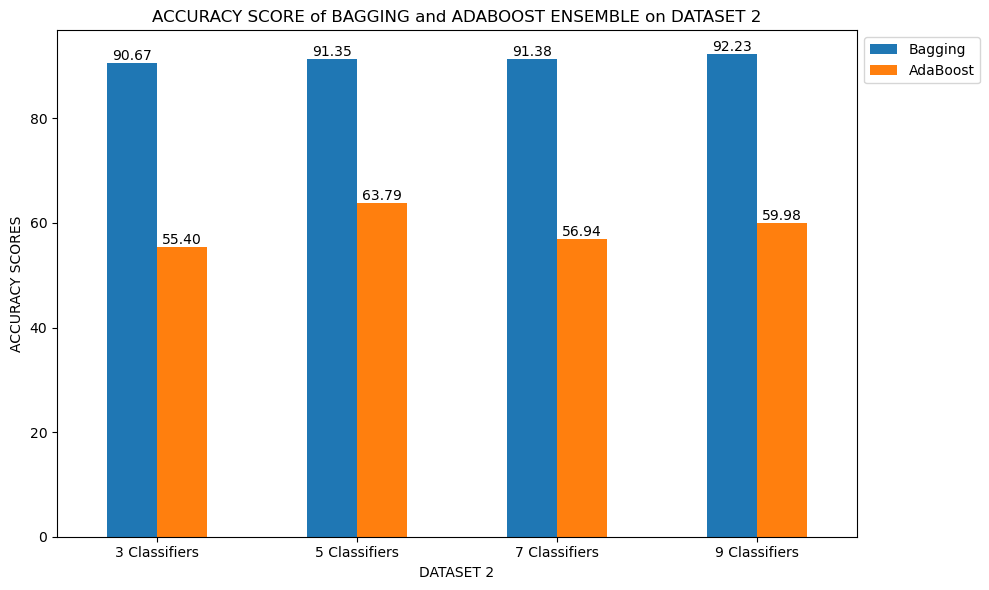

In [107]:
data3={'Bagging': [acc22, acc33, acc44, acc55],
         'AdaBoost': [acc66, acc77, acc88, acc99]}
_df3=pd.DataFrame(data3, columns=['Bagging', 'AdaBoost'],
                   index=['3 Classifiers', '5 Classifiers', '7 Classifiers', '9 Classifiers'])
fig, ax = plt.subplots(figsize=(10, 6))
_df3.plot.bar(ax=ax, rot=0)
def addlabels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.01), 
                    ha='center', va='bottom')
addlabels(ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("ACCURACY SCORE of BAGGING and ADABOOST ENSEMBLE on DATASET 2")
plt.xlabel("DATASET 2")
plt.ylabel("ACCURACY SCORES")
plt.tight_layout() 
plt.show()

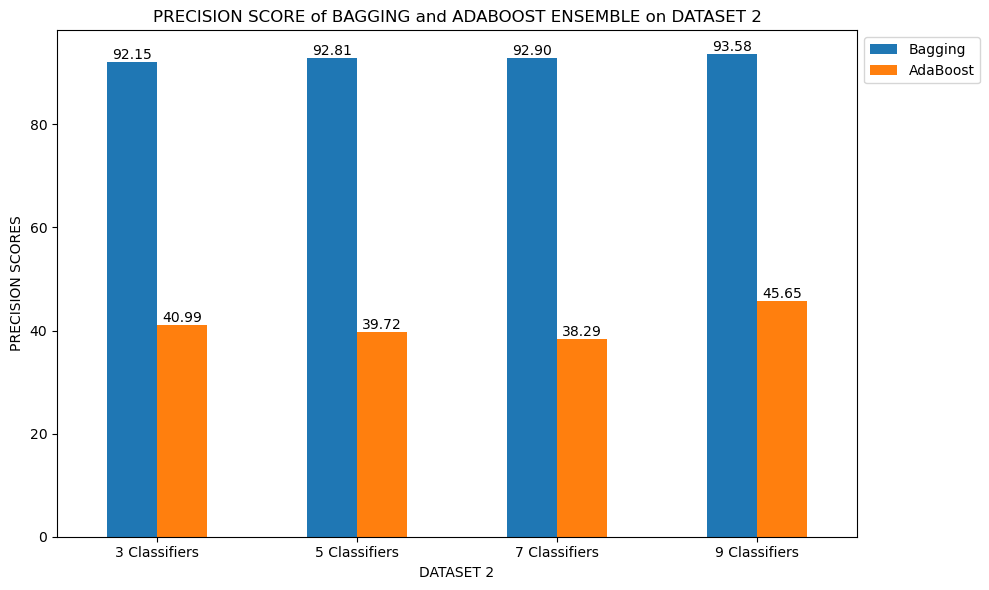

In [108]:
data4={'Bagging': [p22, p33, p44, p55],
         'AdaBoost': [p66, p77, p88, p99]}
_df4=pd.DataFrame(data4, columns=['Bagging', 'AdaBoost'],
                   index=['3 Classifiers', '5 Classifiers', '7 Classifiers', '9 Classifiers'])
fig, ax = plt.subplots(figsize=(10, 6))
_df4.plot.bar(ax=ax, rot=0)
def addlabels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.01), 
                    ha='center', va='bottom')
addlabels(ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("PRECISION SCORE of BAGGING and ADABOOST ENSEMBLE on DATASET 2")
plt.xlabel("DATASET 2")
plt.ylabel("PRECISION SCORES")
plt.tight_layout() 
plt.show()

## THANK YOU